LITERALLY JUST COPY PQSTED THE CODE FROM "karpathy 001"


NOW WE WILL LOOK INTO GRADIENT AND DESCENTS AND THUS START BACK PROPOGATION

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
class Value:
    def __init__(self,data, _children=(), _op = '', label = ''): 
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self._grad = 0 

    def __repr__(self): #If this is not present, the values would be printed out in an ugly manner
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') #adding and feeding the children and previous values
        return out
        
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*') #adding and feeding the children and previous values
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
        
# Children keeps track of what values produces what other values
# prev is a set that tracks of the previous values
# op keeps track of the operations' labels for the user to understand easily
# label helps us keep track of variable names 
'''
grad is used for gradient descents and differentiation
kept 0 which symbolises that gradient would not have an effect on the output value initially,
which is noramlly the case in backprop.
''' 


'\ngrad is used for gradient descents and differentiation\nkept 0 which symbolises that gradient would not have an effect on the output value initially,\nwhich is noramlly the case in backprop.\n'

In [18]:
from graphviz import Digraph

def trace(root):
    #builds a set of all the nodes and edges in the graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr = {'rankdir': 'LR'}) #LR - left to right

    nodes, edges= trace(root)
    for n in nodes:
        uid = str(id(n))
        #for value in the graph, create a rectangular record for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n._grad), shape = 'record')

        if n._op:
            # if this value is a result of some operation, create a node for it
            dot.node(name = uid + n._op, label = n._op)
            #and connect this with an edge
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #connecting n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [14]:
f = Value(-2.0, label = 'f')
l = d * f; l.label = 'L'
l

Value(data = -8.0)

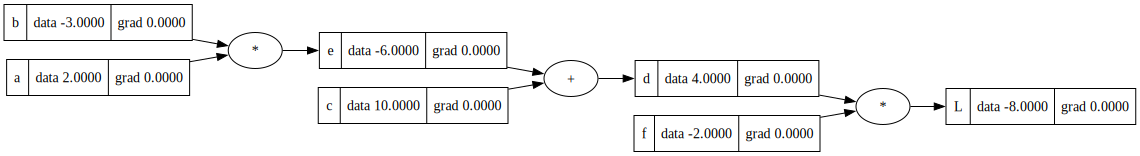

In [19]:
draw_dot(l)

NOW WE CALCULATE BACKPROPOGATION!!


# Heading 2
TO PROPERLY UNDERSTAND, WE WILL DO THEM ONE BY ONE.

CHANGE EVERY VARIABLE'S VALUES BY "H" ONE BY ONE. AND CALCULATE GRADIENTS.

THIS WILL BE THEN EASILY CALCULATED BY ASSIGNING THEM INTO A FUNCTION FOR SEPARATE OPERATIONS LIKE "+" AND "*" 

In [51]:
def lol():
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label = 'f')
    l = d * f; l.label = 'L'

    L1 = l.data

    h = 0.001
    a = Value(2.0, label = 'a')
    #a += Value(h) # derivative of L wrt to a
    b = Value(-3.0, label = 'b')
    b += Value(h) # derivative of L wrt to b
    c = Value(10.0, label = 'c')
    #c += Value(h) # derivative of L wrt to a
    e = a*b; e.label = 'e'
    #e += Value(h) # derivative of L wrt to e
    d = e + c; d.label = 'd'
    #d += Value(h) # derivative of L wrt to d
    f = Value(-2.0, label = 'f')
    #f += Value(h) # derivative of L wrt to f
    l = d * f; l.label = 'L'
    #l += Value(h) # derivative of L wrt to l

    L2 = l.data

    print((L2 - L1) / h)

In [49]:
lol() #derivative wrt a

6.000000000000227


In [52]:
lol()#derivative wrt b

-3.9999999999995595


In [33]:
lol()#derivative wrt c

-1.9999999999953388


In [35]:
lol()#derivative wrt e

-1.9999999999953388


In [37]:
lol()#derivative wrt d

-1.9999999999953388


In [39]:
lol()#derivative wrt f

3.9999999999995595


In [41]:
lol()#derivative wrt l

0.9999999999976694


MANUALLY SETTING EVERYONE'S GRADIENT

In [46]:
a._grad = 6.0
b._grad = -4.0
c._grad = -2.0
e._grad = -2.0
d._grad = -2.0
f._grad = 4.0
l._grad = 1.0

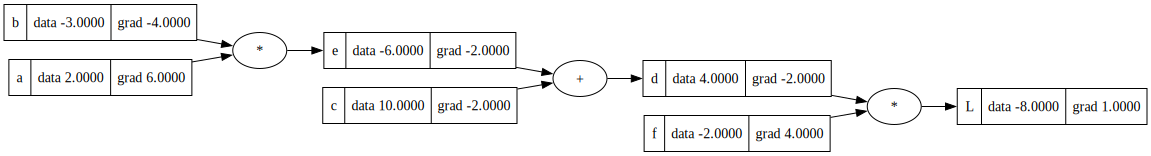

In [47]:
draw_dot(l)

BTW WE CALCULATE THE DERIVATES OF E,C,A AND B WIHT THE HELP OF CHAIN RULE OF DERIVATION

# Heading 2

HERE, FOR ADDITION:  The gradients are normally passed through to the parent nodes from the child node. As it can be seen, C and E are having the same derivates as that of D. That is  because the gradients are passed down to the parent nodes from the cild node in the case of an "addition operation."

NOW, FOR MULTIPLICATION: The gradients are simply the product of the data of their other equivalent node and the gradient of their child node. As it can be seen here, the gradients of A is 6 which is calculated by (-3)x(-2), and the gradient of B is -4 which is calculated by (2)x(-2). Therefore, Gradients in multiplication are the product of the data of their OTHER equivalent node and the gradient of their child node. 